# CS-E4600 - Algorithmic Methods of Data Mining

## Programming project - Code submission

Julius Hietala, Jarkko Tulensalo

## Instructions

Files required in the same folder as this notebook:
* graph.py
* sparse.py
* utils.py
* graphs_processed (graph files folder)
* results (output files folder)

In the below cell:
* We import the Graph class and utils
* We set the "graph_name" variable to choose for which graph we want to do the partitioning (default is 'ca-GrQc', since it is the smallest and quickest to run)
* We set "precomputed_eigenvectors" to configure whether to use precomputed eigenvectors from a separate file to speed up the partitioning (useful with the larger graphs). These eigenvectors can be saved by calling "save_eigenvalues_for_all_graphs", saves 100 eigenvectors corresponding to the 100 smallest real valued eigenvalues per algorithm type, this takes quite a while (default is False)


Default range for the number of eigenvector components to use is [k, k + 50], where k is number of desired partition clusters. For ca-GrQc k=2, so partition_graph function tries eigenvector components between [2, 52].

In [4]:
from graph import Graph
from utils import save_eigenvalues_for_all_graphs

graph_name = 'ca-GrQc' # Options: 'ca-GrQc','Oregon-1','soc-Epinions1','web-NotreDame','roadNet-CA'
precomputed_eigenvectors = False #If True, need to call save_eigenvalues_for_all_graphs() first

## Initialise Graph class and draw graph

In the below cell, we initialise the Graph class and plot the graph.

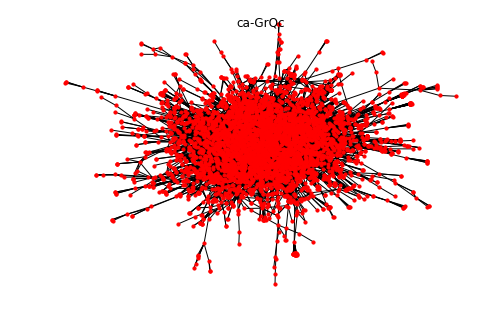

In [5]:
graph = Graph(fname=graph_name)
graph.draw_map()

## Find smallest ratio cut
The "partition_graph" function experiments on the three different spectral graph partition algorithms and saves the lowest scoring result to the "results" folder. The default range for experiments on the number of eigenvector components is [k, k + 50], where k is number of desired partitions. For example for the default "ca-GrQc" $k$ is 2, so the function experiments on using eigenvector components between [2, 52]. The partition_graph function should last about 10 minutes for ca-GrQc.

Below, we run the partitioning, print the results per algorithm and create a plot showing the ratio cut for each algorithm and amount of eigenvectors.

/Users/juliushietala/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


With the algorithm utilizing the unnormalised Laplacian, the smallest ratio cut of 0.06274 was found with 9 eigenvector components.
With the algorithm utilizing the generalised eigenproblem, the smallest ratio cut of 0.06274 was found with 4 eigenvector components.
With the algorithm utilizing the normalised Laplacian, the smallest ratio cut of 0.07573 was found with 2 eigenvector components.


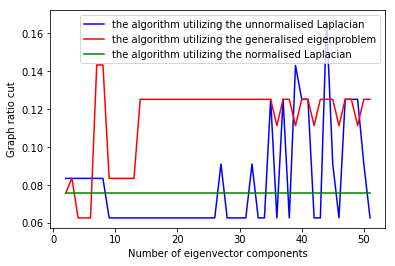

In [6]:
graph.partition_graph(precomputed_eigenvectors=precomputed_eigenvectors)

From the above, we can easily see that the algorithms utilizing the generalised eigenproblem and the unnormalized worked best for this graph.